### Installing Requisite Packages


In [1]:
!pip install rogue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rogue: filename=rogue-0.0.2-py3-none-any.whl size=7231 sha256=141efaf7fa8415f32042f5aad99faa910df92ae233c4d567d5dd1b54a88079d2
  Stored in directory: /root/.cache/pip/wheels/1c/50/58/d872fda5fb450e3fc2abafbcbe1a6c190e4b71ab0e1422f53d
Successfully built rogue


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 86.4 MB/s 
     |████████████████████████████████| 182 kB 97.0 MB/s 
     |████████████████████████████████| 132 kB 85.0 MB/s 
     |████████████████████████████████| 127 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing Reqired Packages

In [4]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Defining the 'Contraction Mapping' dictionary

In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

### Data Prep for initial attempt:

Initially we wanted to work with the 'cnn_dailymail' dataset provided by huggingface. This dataset has 287k rows in the training set and contains articles from CNN and DailyMail. However, due to computation constraints we had to sample this data. Sampling however did not help and the final Rogue Scores did not even have a 0.1 average for Rogue-1. Hence we had to switch up the dataset.

In [7]:
# import datasets
# from datasets import load_dataset

# data_mail = load_dataset("cnn_dailymail","1.0.0")

In [8]:
# df_train_mail = data_mail['train'].to_pandas()

In [9]:
# df_train_mail = df_train_mail.sample(n=50000)

In [10]:
# df_valid_mail = data_mail['validation'].to_pandas()

In [11]:
# df_test_mail = data_mail['test'].to_pandas()

In [12]:
# df_train_mail.columns

In [17]:
# df_train_mail['Article_Clean'] = cleaned_text
# df_train_mail['Highlight_Clean'] = cleaned_train_highlight
# df_train_mail['Highlight_Clean'].replace('', np.nan, inplace=True)
# df_train_mail.dropna(axis=0,inplace=True)

In [23]:
# df_train_mail.drop(['article','highlights','id'], axis=1, inplace=True)

In [24]:
# df_train_mail['Highlight_Clean'] = df_train_mail['Highlight_Clean'].apply(lambda x : '_START_ '+ x + ' _END_')

In [29]:
#Vlaidation Set
# cleaned_val_highlight = []
# for t in df_valid_mail['highlights']:
#     cleaned_val_highlight.append(summary_cleaner(t))

# cleaned_valid_article = []
# for t in df_valid_mail['article']:
#     cleaned_valid_article.append(text_cleaner(t))

# df_valid_mail['Article_Clean'] = cleaned_valid_article
# df_valid_mail['Highlight_Clean'] = cleaned_val_highlight
# df_valid_mail['Highlight_Clean'].replace('', np.nan, inplace=True)
# df_valid_mail.dropna(axis=0,inplace=True)
# df_valid_mail.drop(['article','highlights','id'], axis=1, inplace=True)
# df_valid_mail['Highlight_Clean'] = df_valid_mail['Highlight_Clean'].apply(lambda x : '_START_ '+ x + ' _END_')

In [30]:
#Test Set
# cleaned_test_highlight = []
# for t in df_test_mail['highlights']:
#     cleaned_test_highlight.append(summary_cleaner(t))

# cleaned_test_article = []
# for t in df_test_mail['article']:
#     cleaned_test_article.append(text_cleaner(t))

# df_test_mail['Article_Clean'] = cleaned_test_article
# df_test_mail['Highlight_Clean'] = cleaned_test_highlight
# df_test_mail['Highlight_Clean'].replace('', np.nan, inplace=True)
# df_test_mail.dropna(axis=0,inplace=True)
# df_test_mail.drop(['article','highlights','id'], axis=1, inplace=True)
# df_test_mail['Highlight_Clean'] = df_test_mail['Highlight_Clean'].apply(lambda x : '_START_ '+ x + ' _END_')

In [31]:
# x_tr = df_train_mail['Article_Clean']
# y_tr = df_train_mail['Highlight_Clean']

# x_test = df_test_mail['Article_Clean']
# y_test = df_test_mail['Highlight_Clean']


In [32]:
# x_val = df_valid_mail['Article_Clean']
# y_val = df_valid_mail['Highlight_Clean']

### ----Code Begins-----

### Loading the Dataset:

In [13]:
df = pd.read_csv('/content/news_summary_more.csv', encoding='latin-1')
df = df[['text','headlines']]

In [14]:
df.rename({'text':'article', 'headlines':'summary'}, axis=1,inplace=True)

### Data Cleaning -

#### Regular Expressions, BeautifulSoup, nltk - stopwords

In [15]:
stop_words = set(stopwords.words('english')) 
# Function to clean up the news articles
def text_cleaner(text):
    text = str(text)
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
# for t in df_train_mail['article']:
#     cleaned_text.append(text_cleaner(t))
for t in df['article']:
  cleaned_text.append(text_cleaner(t))

In [16]:
# Function to clean up summaries

def summary_cleaner(text):
    text = str(text)
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

cleaned_train_highlight = []
# for t in df_train_mail['highlights']:
#     cleaned_train_highlight.append(summary_cleaner(t))
for t in df['summary']:
  cleaned_train_highlight.append(summary_cleaner(t))

In [18]:
# len(cleaned_text)

In [19]:
df['Article_Clean'] = cleaned_text
df['Highlight_Clean'] = cleaned_train_highlight
df['Highlight_Clean'].replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

In [20]:
df.columns

Index(['article', 'summary', 'Article_Clean', 'Highlight_Clean'], dtype='object')

In [21]:
df.drop(['summary','article'], axis=1, inplace=True)

In [22]:
df['Highlight_Clean'] = df['Highlight_Clean'].apply(lambda x : '_START_ '+ x + ' _END_')

### Plotting the length of articles and smmaries to fix a max length

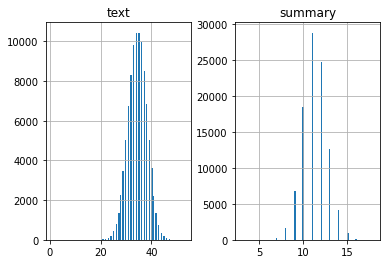

In [25]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
# for i in df_train_mail['Article_Clean']:
#       text_word_count.append(len(i.split()))

for i in df['Article_Clean']:
      text_word_count.append(len(i.split()))

for i in df['Highlight_Clean']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 100)
plt.show()

### Based on observation, 99% of summaries are less than 15 words in length

In [26]:
cnt=0
for i in df['Highlight_Clean']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(df['Highlight_Clean']))

0.9983943252609222


In [27]:
max_len_article= 50
max_len_highlight=15

### Splitting the data into train and test sets

In [28]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['Article_Clean']),np.array(df['Highlight_Clean']),test_size=0.2,random_state=0,shuffle=True)

### Fitting a tokenizer on text to generate vocabularies

In [33]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [34]:
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length set earlier
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_article, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_article, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [35]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_highlight, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_highlight, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

### Importing the attention layer

In [36]:
import requests

url = 'https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py'
r = requests.get(url)

with open('attention.py', 'w') as f:
    f.write(r.text)
import attention as att


### Creating the Model Architecture

In [37]:
from keras import backend as K
K.clear_session() 
latent_dim = 500

# Encoder 
encoder_inputs = Input(shape=(max_len_article,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

# # LSTM 2 
# encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
# encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

# #LSTM 3 
# encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
# encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2) 

# #LSTM 4 
# encoder_lstm4=LSTM(latent_dim, return_state=True, return_sequences=True) 
# encoder_output4, state_h4, state_c4 = encoder_lstm4(encoder_output3) 

#LSTM 5
encoder_lstm5=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm5(encoder_output1) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = att.AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 500)      34523500    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 50, 500),    2002000     ['embedding[0][0]']              
                                 (None, 500),                                                 

In [38]:
import tensorflow as tf

### Compiling model with the Optimizer - RMSProp and Loss - sparse_categorical_crossentropy

In [39]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [40]:
#Setting up early stopping callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 1, restore_best_weights = True)

### Train the model

In [41]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,batch_size=64, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]), callbacks= es)

Epoch 1/50
1230/1230 [==============================] - 216s 168ms/step - loss: 4.9104 - val_loss: 4.3363
Epoch 2/50
1230/1230 [==============================] - 210s 171ms/step - loss: 4.2032 - val_loss: 3.9858
Epoch 3/50
1230/1230 [==============================] - 209s 170ms/step - loss: 3.8444 - val_loss: 3.7900
Epoch 4/50
1230/1230 [==============================] - 210s 171ms/step - loss: 3.5949 - val_loss: 3.6826
Epoch 5/50
1230/1230 [==============================] - 209s 170ms/step - loss: 3.3752 - val_loss: 3.6089
Epoch 6/50
1230/1230 [==============================] - 209s 170ms/step - loss: 3.1768 - val_loss: 3.5681
Epoch 7/50
1230/1230 [==============================] - 208s 169ms/step - loss: 3.0243 - val_loss: 3.5850
Epoch 7: early stopping


### Train v Validation Loss curve

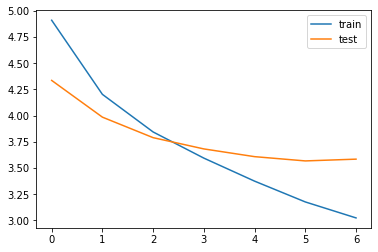

In [42]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

### Setting up the Encoder Decoder inference

In [43]:

reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [44]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_article,latent_dim))

dec_emb2= dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [45]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    
    target_seq = np.zeros((1,1))

    
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1])
        if sampled_token_index == 0: break
        else: sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_highlight-1)):
                stop_condition = True

        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        
        e_h, e_c = h, c

    return decoded_sentence

In [46]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

### Generating 5 sample outputs

In [47]:
for i in range(5):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_article)))
  print("\n")

Review: french cosmetics company paris named val garland global makeup director makeup artist created runway looks editorial coverage major fashion publications apart working celebrities including taylor swift lady gaga cannot wait get inside science labs number one beauty brand create make said val 
Original summary: garland named global makeup director for or al paris 
1/1 [==============================] - 0s 15ms/step
Predicted summary:  paris fashion week paris tower for music at cannes


Review: cristiano ronaldo scored two second half goals help side real madrid thrash cyprus based apoel champions league group stage tuesday ronaldo took ucl goals tally calendar year meanwhile manchester city claimed win dutch club feyenoord another group match courtesy raheem sterling late winner 
Original summary: ronaldo hits brace as real win in ucl man city win 
1/1 [==============================] - 0s 15ms/step
Predicted summary:  ronaldo scores as real madrid win in real madrid win


Revi

In [48]:
pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
history_rouge1 = {'r': [], 'p': [] ,'f':[]}
history_rouge2 = {'r': [], 'p': [] ,'f':[]}
history_rougeL = {'r': [], 'p': [] ,'f':[]}

### Calculate Rogue scores for 500 test samples

In [50]:
from rouge import Rouge
predictions = []
actuals = []
for i in range(500):
  existing_summary = seq2summary(y_val[i])
  output = decode_sequence(x_val[i].reshape(1,max_len_article))
  rog_score = Rouge()
  scores = rog_score.get_scores(output,existing_summary)
  predictions.append(output)
  actuals.append(existing_summary)
  history_rouge1['r'].append(scores[0]['rouge-1']['r'])
  history_rouge1['p'].append(scores[0]['rouge-1']['p'])
  history_rouge1['f'].append(scores[0]['rouge-1']['f'])
  history_rouge2['r'].append(scores[0]['rouge-2']['r'])
  history_rouge2['p'].append(scores[0]['rouge-2']['p'])
  history_rouge2['f'].append(scores[0]['rouge-2']['f'])
  history_rougeL['r'].append(scores[0]['rouge-l']['r'])
  history_rougeL['p'].append(scores[0]['rouge-l']['p'])
  history_rougeL['f'].append(scores[0]['rouge-l']['f'])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step


In [51]:
len(history_rouge1['r'])

500

### Plot exact and average values for Rogue 1, 2 and L for the 500 samples.

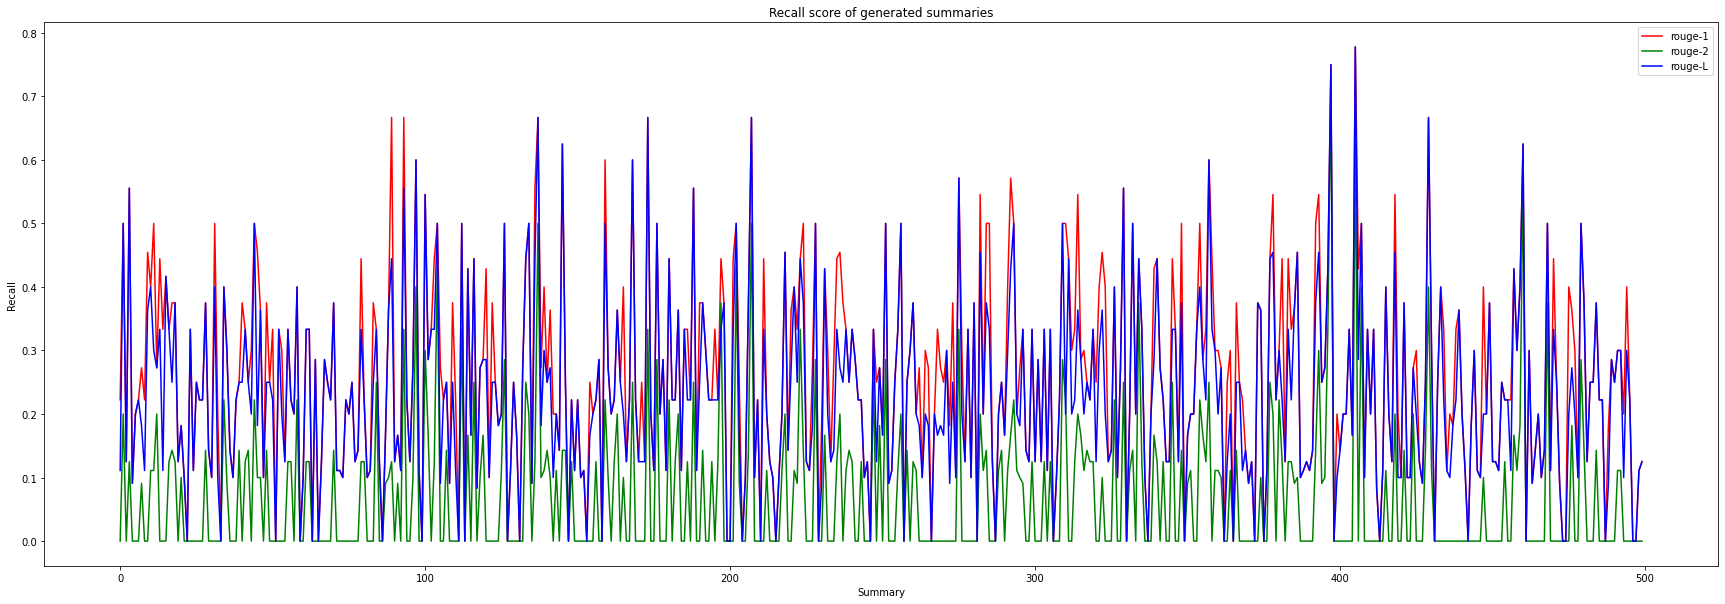

In [60]:
import math
#recall
X = np.arange(0,len(history_rouge1['r']))
y = history_rouge1['r']
z = history_rouge2['r']
zz= history_rougeL['r'] 
plt.figure(figsize=(30,10))
plt.plot(X, y, color='r', label='rouge-1')
plt.plot(X, z, color='g', label='rouge-2')
plt.plot(X, zz, color='b', label='rouge-L')
plt.xlabel("Summary")
plt.ylabel("Recall")
plt.title("Recall score of generated summaries")
plt.legend()
plt.show()

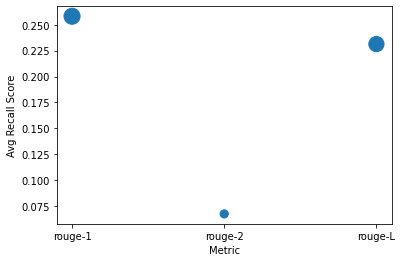

In [53]:
#avg recall
y=[np.mean(history_rouge1['r']),np.mean(history_rouge2['r']),np.mean(history_rougeL['r'])]
x=['rouge-1','rouge-2','rouge-L']
s=[1000*n for n in y]
plt.scatter(x,y,s)
plt.xlabel("Metric")
plt.ylabel("Avg Recall Score")
plt.show()

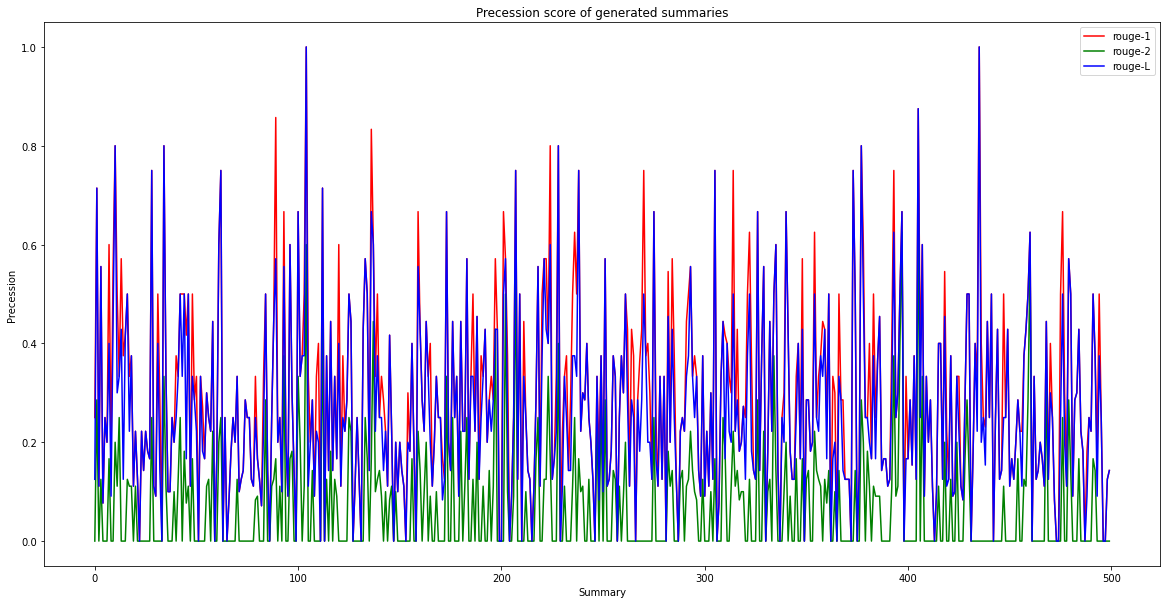

In [61]:
#precision
X = np.arange(0,len(history_rouge1['p']))
y = history_rouge1['p']
z = history_rouge2['p']
zz= history_rougeL['p'] 
plt.figure(figsize=(20,10))
plt.plot(X, y, color='r', label='rouge-1')
plt.plot(X, z, color='g', label='rouge-2')
plt.plot(X, zz, color='b', label='rouge-L')
plt.xlabel("Summary")
plt.ylabel("Precession")
plt.title("Precession score of generated summaries")
plt.legend()
plt.show()

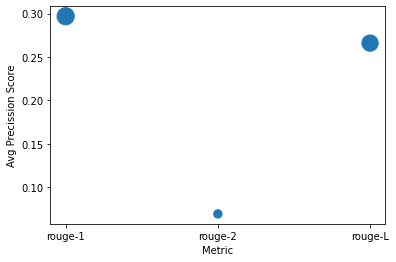

In [55]:
#avg precision
y=[np.mean(history_rouge1['p']),np.mean(history_rouge2['p']),np.mean(history_rougeL['p'])]
x=['rouge-1','rouge-2','rouge-L']
s=[1000*n for n in y]
plt.scatter(x,y,s)
plt.xlabel("Metric")
plt.ylabel("Avg Precission Score")
plt.show()

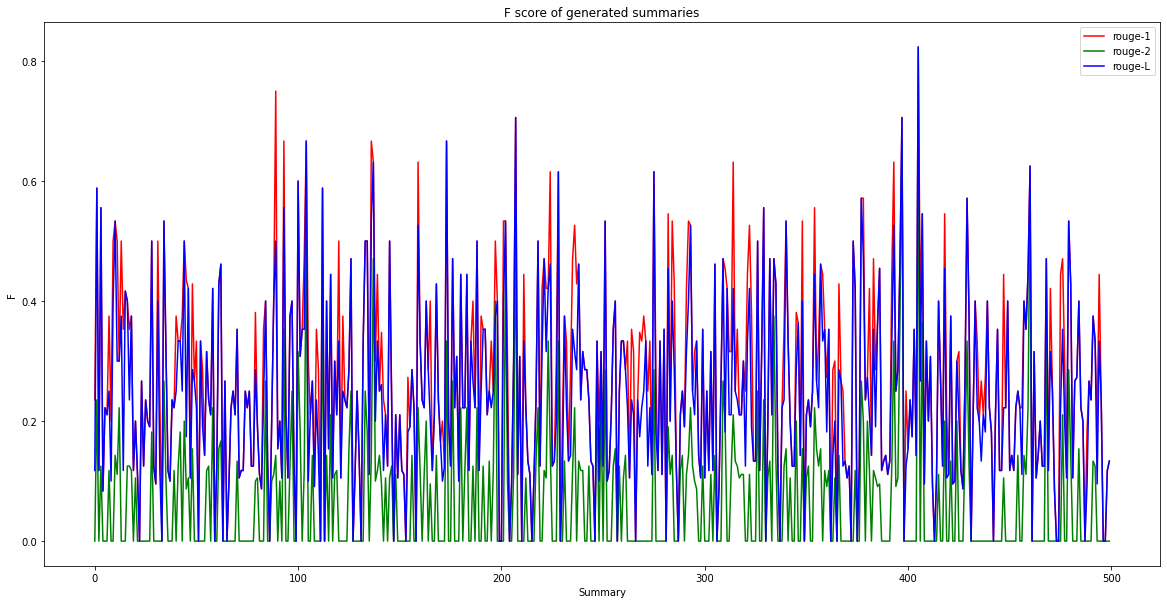

In [62]:
#fscores
X = np.arange(0,len(history_rouge1['f']))
y = history_rouge1['f']
z = history_rouge2['f']
zz= history_rougeL['f'] 
plt.figure(figsize=(20,10))
plt.plot(X, y, color='r', label='rouge-1')
plt.plot(X, z, color='g', label='rouge-2')
plt.plot(X, zz, color='b', label='rouge-L')
plt.xlabel("Summary")
plt.ylabel("F")
plt.title("F score of generated summaries")
plt.legend()
plt.show()

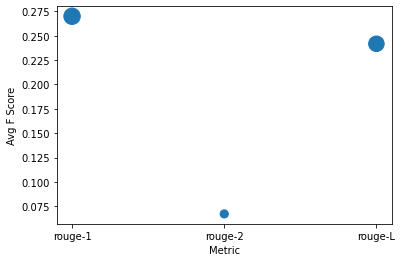

In [57]:
#avg f
y=[np.mean(history_rouge1['f']),np.mean(history_rouge2['f']),np.mean(history_rougeL['f'])]
x=['rouge-1','rouge-2','rouge-L']
s=[1000*n for n in y]
plt.scatter(x,y,s)
plt.xlabel("Metric")
plt.ylabel("Avg F Score")
plt.show()

In [58]:
#create df with generated and actual summaries
final_df = pd.DataFrame({'Generated Text':predictions,'Actual Text':actuals})
final_df.to_csv('/content/predictions.csv')
print('Output Files generated for review')

Output Files generated for review


### Thank You!!